# Star Wars Fan Survey

In anticipation for the release of the seventh episode in the Star Wars saga, Star Wars The Force Awakens, the team at [FiveThirtyEight](https://fivethirtyeight.com/) created a survey to answer a very important question: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The survey in question was administered using an online tool called SurveyMonkey. At the end of the pollong period, they received 835 total responses. Their GitHub repository can be found [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

the data has several columns, including:
- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household Income` - The respondent's income
- `Education` - The respondent's education level
- `Location (Census Region)` - The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a `Yes` or `No` response

## Importing and Exploring the Data

In [1]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Just based of the first ten entries in the dataset, and the columns names, there appears to be a lot missing/strange data. To start off, we'll remove all the rows that do not contain a `RespondentID`.

In [3]:
star_wars = star_wars[pd.notnull(star_wars.RespondentID)]

## Data Cleaning

Now that all of the missing `RespondentID`s have been taken care. Let's continue with some additional cleaning of the data. 

The Yes/No question columns:
- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

currently are represented by the strings `Yes` and `No`. To make later analysis less cumbersome, these string will be converted into their corresponding boolean values, `True` and `False`.

In [4]:
yes_no_map = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no_map)
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no_map)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns deal with whether or not each respondent saw any of the other Star Wars movies. In the poll, these questions were posed as checkboxs. In the dataset that we're using, if the name of the movie appears, that means that the respondent saw the movie. Otherwise, if the data contains an `NaN` or is missing, we can conclude they didn't see that movie. Jus like we did above, we'll convert the values in these columns to booleans.

In [6]:
import numpy as np

saw_movie_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
} 

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(saw_movie_map)

Having columns named in a way that makes intuitive sense is always preferrable. Currently the columns that we mapped over have names following the pattern of `Unnamed: x`, which aren't entirely helpful. So we'll rename them. 

In [7]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

## Rankings

Now that we have cleaned the ranking columns, we can take the mean of these columns. This will reveal the highest-ranked movie in the Star Wars saga.

In [10]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Text(0.5, 1.0, 'Star Wars Movie Rankings')

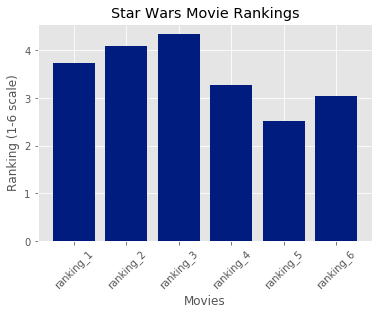

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-dark-palette')

ax = plt.subplot()
plt.bar(range(len(star_wars.columns[9:15])), star_wars[star_wars.columns[9:15]].mean())
ax.set_xticks(range(len(star_wars.columns[9:15])))
ax.set_xticklabels(star_wars.columns[9:15].values, rotation=45)
plt.xlabel("Movies")
plt.ylabel("Ranking (1-6 scale)")
plt.title("Star Wars Movie Rankings")

From the plot above we can see that the "original" trilogy is more liked that the prequel trilogy. The movie with lowest average (the most liked) corresponds to `ranking_5`, which is `Star Wars: The Empire Strikes Back`.

To get a better idea if this is true, we'll return to the `seen_` columns and calcualte how many respondents saw each movie, From there, we can get a weighed average and determine which of the six movies is liked the most

In [22]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

Text(0.5, 1.0, 'Star Wars Seen by Respondents')

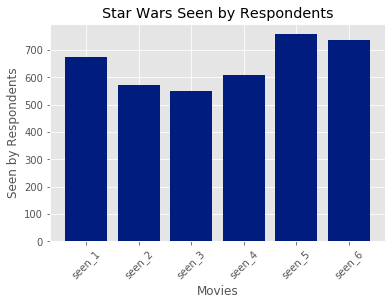

In [23]:
ax = plt.subplot()
plt.bar(range(len(star_wars.columns[3:9])), star_wars[star_wars.columns[3:9]].sum())
ax.set_xticks(range(len(star_wars.columns[3:9])))
ax.set_xticklabels(star_wars.columns[3:9].values, rotation=45)
plt.xlabel("Movies")
plt.ylabel("Seen by Respondents")
plt.title("Star Wars Seen by Respondents")

It would seem that not only do the "original" trilogy rank higher, but they have also been seen by a higher percentage of the respondents to this poll. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

We can subset the data even further, by analyzing three more columns:
- `Do you consider yourself to be a fan of the Star Wars film franchise?`
- `Do you consider yourself to be a fan of the Star Trek franchise?`
- `Gender`

Let's see how the incorporation of these data influences the ranking of each movie. 

In [24]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

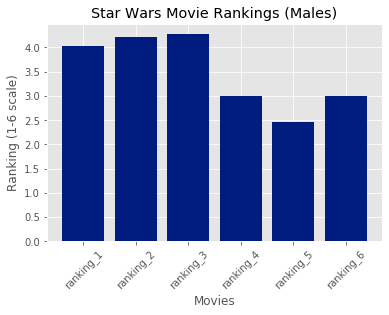

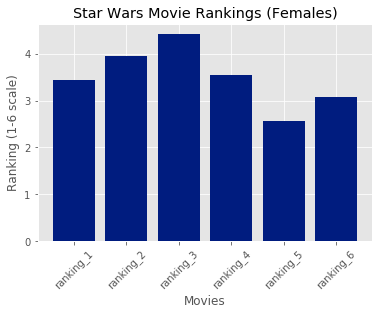

In [25]:
ax = plt.subplot()
plt.bar(range(len(males.columns[9:15])), males[males.columns[9:15]].mean())
ax.set_xticks(range(len(males.columns[9:15])))
ax.set_xticklabels(males.columns[9:15].values, rotation=45)
plt.xlabel("Movies")
plt.ylabel("Ranking (1-6 scale)")
plt.title("Star Wars Movie Rankings (Males)")
plt.show()

ax = plt.subplot()
plt.bar(range(len(females.columns[9:15])), females[females.columns[9:15]].mean())
ax.set_xticks(range(len(females.columns[9:15])))
ax.set_xticklabels(females.columns[9:15].values, rotation=45)
plt.xlabel("Movies")
plt.ylabel("Ranking (1-6 scale)")
plt.title("Star Wars Movie Rankings (Females)")
plt.show()

These two gender plots are in general accordance with each other

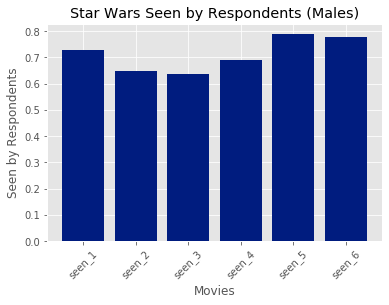

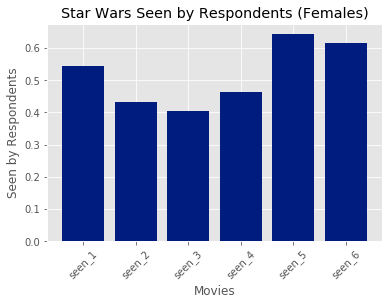

In [27]:
ax = plt.subplot()
plt.bar(range(len(males.columns[3:9])), males[males.columns[3:9]].mean())
ax.set_xticks(range(len(males.columns[3:9])))
ax.set_xticklabels(males.columns[3:9].values, rotation=45)
plt.xlabel("Movies")
plt.ylabel("Seen by Respondents")
plt.title("Star Wars Seen by Respondents (Males)")
plt.show()

ax = plt.subplot()
plt.bar(range(len(females.columns[3:9])), females[females.columns[3:9]].mean())
ax.set_xticks(range(len(females.columns[3:9])))
ax.set_xticklabels(females.columns[3:9].values, rotation=45)
plt.xlabel("Movies")
plt.ylabel("Seen by Respondents")
plt.title("Star Wars Seen by Respondents (Females)")
plt.show()

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.

Potenial next steps:
- Try to segment the data based on columns like `Education`, `Location (Census Region)`, and `Which character shot first?`, which aren't binary. Are they any interesting patterns?
- Clean up columns `15` to `29`, which contain data on the characters respondents view favorably and unfavorably.
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?